In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from mpl_toolkits.mplot3d import Axes3D

In [35]:
df = pd.read_csv('us_bank_wages/us_bank_wages.txt', sep="\t")
df.head()

Unnamed: 0  SALARY  EDUC  SALBEGIN  GENDER  MINORITY  JOBCAT
0           0   57000    15     27000       1         0       3
1           1   40200    16     18750       1         0       1
2           2   21450    12     12000       0         0       1
3           3   21900     8     13200       0         0       1
4           4   45000    15     21000       1         0       1

In [36]:
df.shape

(474, 7)

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 474 entries, 0 to 473
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype
---  ------      --------------  -----
 0   Unnamed: 0  474 non-null    int64
 1   SALARY      474 non-null    int64
 2   EDUC        474 non-null    int64
 3   SALBEGIN    474 non-null    int64
 4   GENDER      474 non-null    int64
 5   MINORITY    474 non-null    int64
 6   JOBCAT      474 non-null    int64
dtypes: int64(7)
memory usage: 26.0 KB


In [38]:
df.describe()

Unnamed: 0         SALARY        EDUC      SALBEGIN      GENDER  \
count  474.000000     474.000000  474.000000    474.000000  474.000000   
mean   236.500000   34419.567511   13.491561  17016.086498    0.544304   
std    136.976275   17075.661465    2.884846   7870.638154    0.498559   
min      0.000000   15750.000000    8.000000   9000.000000    0.000000   
25%    118.250000   24000.000000   12.000000  12487.500000    0.000000   
50%    236.500000   28875.000000   12.000000  15000.000000    1.000000   
75%    354.750000   36937.500000   15.000000  17490.000000    1.000000   
max    473.000000  135000.000000   21.000000  79980.000000    1.000000   

         MINORITY      JOBCAT  
count  474.000000  474.000000  
mean     0.219409    1.411392  
std      0.414284    0.773201  
min      0.000000    1.000000  
25%      0.000000    1.000000  
50%      0.000000    1.000000  
75%      0.000000    1.000000  
max      1.000000    3.000000

In [ ]:
df.eval('SALDIFF = SALARY - SALBEGIN', inplace=True)

In [135]:
df.eval('SALRISE = SALARY / SALBEGIN', inplace=True)

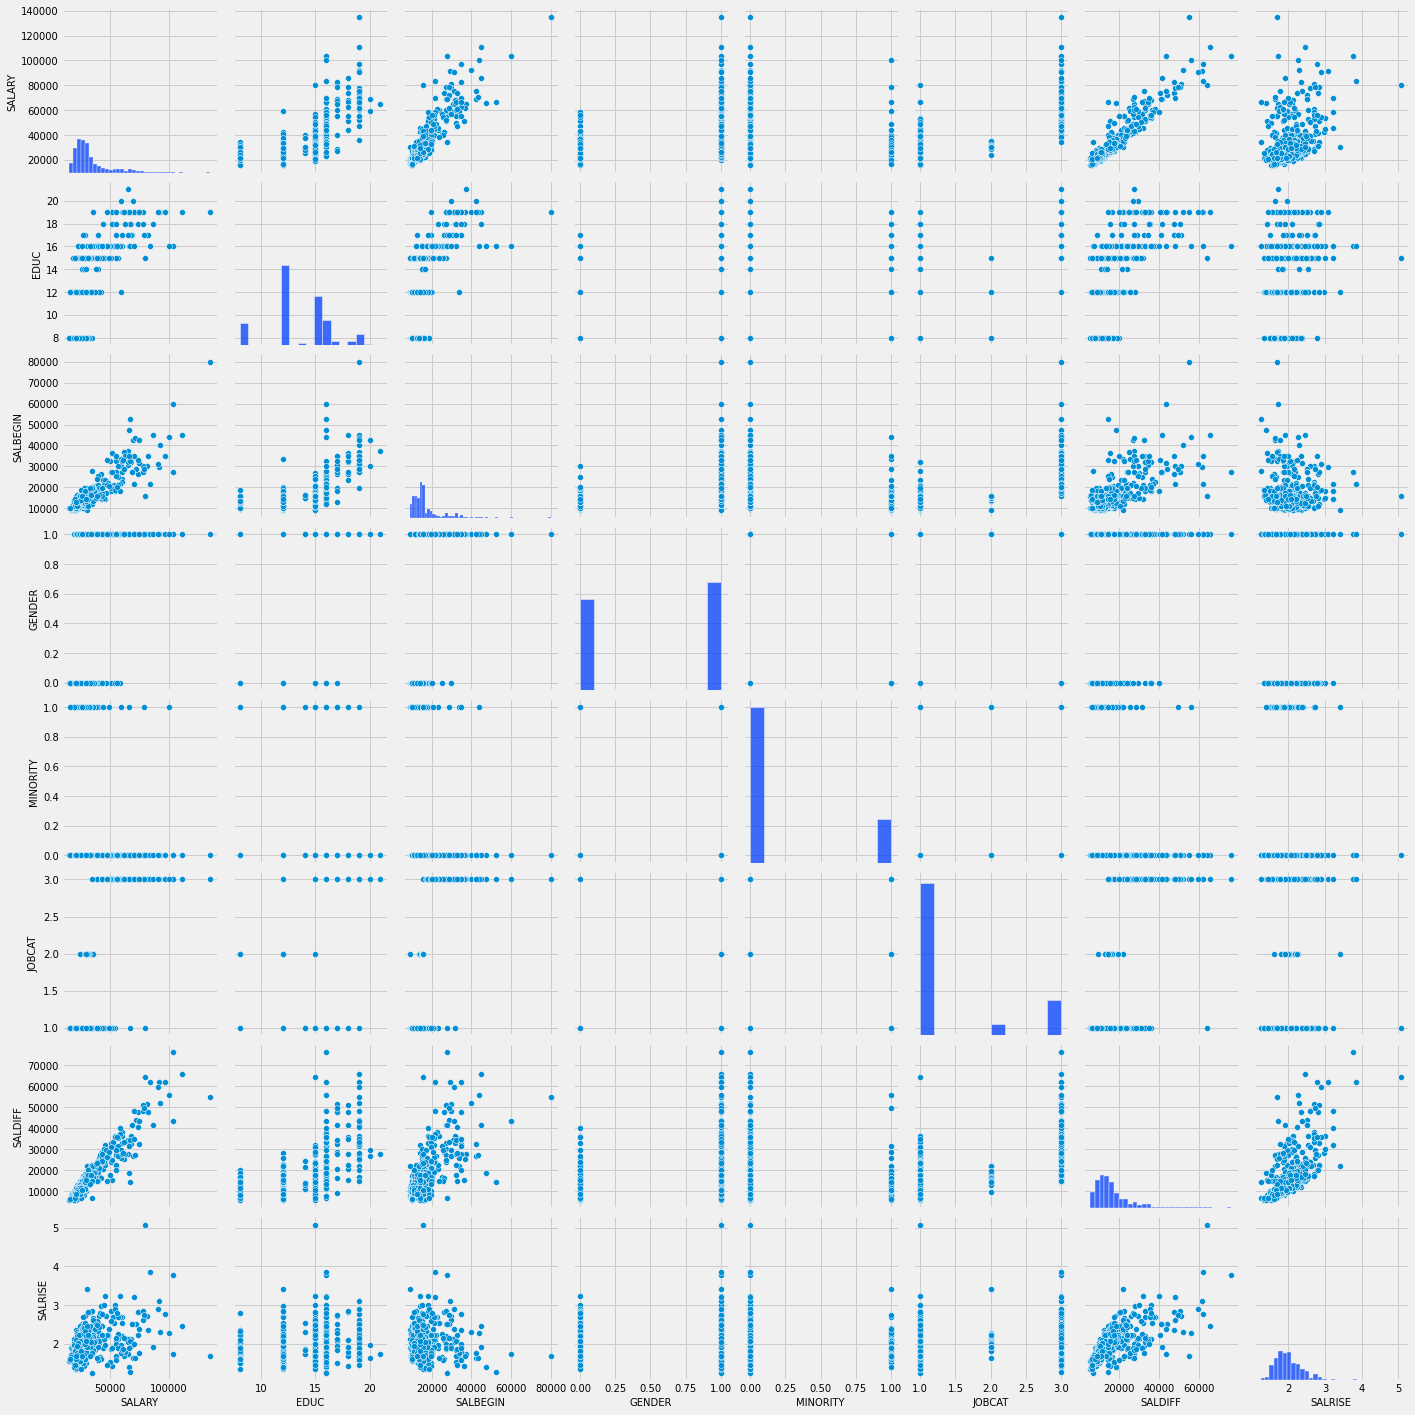

In [179]:
# SALARY	EDUC	SALBEGIN	GENDER	MINORITY	JOBCAT
X1 = df[['SALARY', 'EDUC', 'SALBEGIN', 'GENDER', 'MINORITY', 'JOBCAT', 'SALDIFF', 'SALRISE']]
sns.pairplot(X1, kind='scatter');

In [137]:
job_gender_df = pd.crosstab(df.JOBCAT, df.GENDER)
job_gender_df

GENDER    0    1
JOBCAT          
1       206  157
2         0   27
3        10   74

### Gender- & Jobcategory distribution

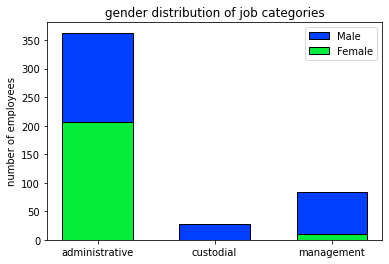

In [47]:
plt.style.use('seaborn-bright')
gender = ['Male', 'Female']
p1 = plt.bar(np.arange(3), job_gender_df[1], 0.6, edgecolor='black', bottom=job_gender_df[0])
p2 = plt.bar(np.arange(3), job_gender_df[0], 0.6, edgecolor='black')
#plt.ylim(ymax=6000, ymin=0)
plt.ylabel('number of employees')
plt.title('gender distribution of job categories')
plt.xticks(np.arange(3), ['administrative', 'custodial', 'management'])
#plt.xticks(rotation=45)
plt.legend(gender,loc=1)
plt.show()

### Salary vs Einstiegsgehalt (& Gender)

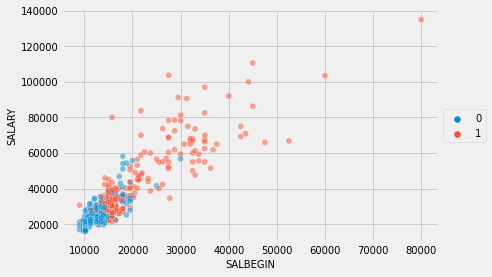

In [221]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df,
    x='SALBEGIN',           
    y='SALARY',
    hue='GENDER',                 # group points by color
    #size='MINORITY'        # group points by size
    #style='JOBCAT',
    alpha=0.5
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Salary vs Einstiegsgehalt & Education

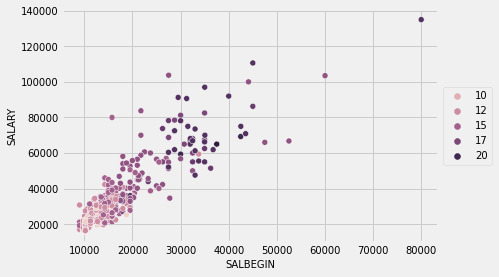

In [220]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df,
    x='SALBEGIN',           
    y='SALARY',
    hue='EDUC',                 # group points by color
    #size='MINORITY'        # group points by size
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Salary distribution for Man and Woman

In [77]:
salary_m = df[df['GENDER']==1].SALARY
salary_f = df[df['GENDER']==0].SALARY

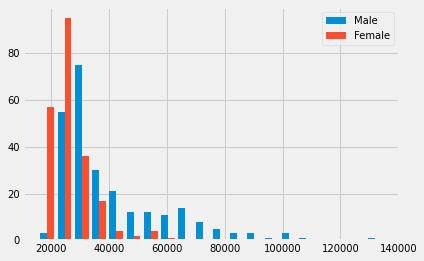

In [115]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([salary_m, salary_f], label=("Male", "Female"), bins=20)
ax.legend()

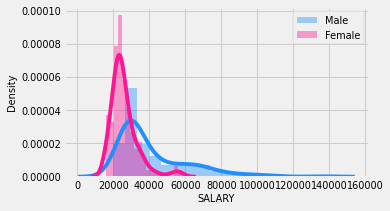

In [180]:
plt.subplots(figsize=(5,3), dpi=70)
sns.distplot(salary_m , color="dodgerblue", label='Male')
sns.distplot(salary_f , color="deeppink", label='Female')
plt.legend();

### Einstiegsgehalt for Man and Woman

In [83]:
salbegin_m = df[df['GENDER']==1].SALBEGIN
salbegin_f = df[df['GENDER']==0].SALBEGIN

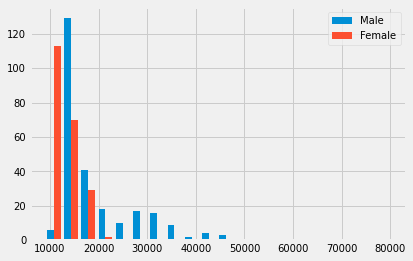

In [116]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([salbegin_m, salbegin_f], label=("Male", "Female"), bins=20)
ax.legend()

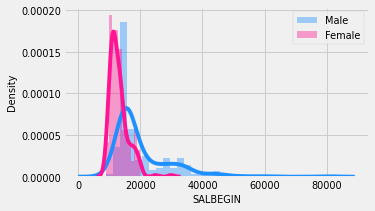

In [181]:
plt.subplots(figsize=(5,3), dpi=70)
sns.distplot(salbegin_m , color="dodgerblue", label='Male')
sns.distplot(salbegin_f , color="deeppink", label='Female')
plt.legend();

### Education vs Salaries (& Jobcategories)

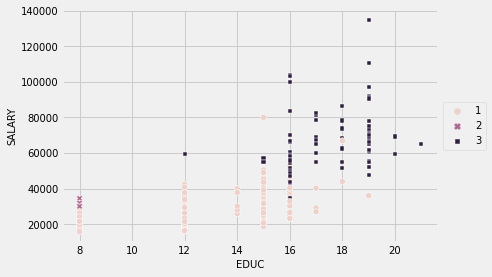

In [185]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df,
    x='EDUC',           
    y='SALARY',
    hue='JOBCAT',                 # group points by color
    #hue_norm=(0,3),
    style='JOBCAT',
    #size='SALBEGIN',        # group points by size
    #sizes=(20,200)
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Education Distribution for Man and Woman

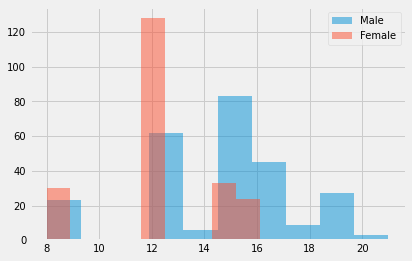

In [218]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(educ_m, label="Male", alpha=0.5)
ax.hist(educ_f, label="Female", alpha=0.5)
ax.legend()

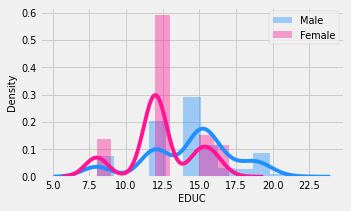

In [219]:
plt.subplots(figsize=(5,3), dpi=70)
sns.distplot(educ_m , color="dodgerblue", label='Male')
sns.distplot(educ_f , color="deeppink", label='Female')
plt.legend();

### Salary distribution for Management (& Gender)

In [90]:
manager_m = df[(df['GENDER']==1) & (df['JOBCAT']==3)].SALARY
manager_f = df[(df['GENDER']==0) & (df['JOBCAT']==3)].SALARY

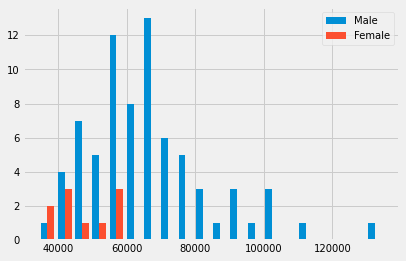

In [117]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist([manager_m, manager_f], label=("Male", "Female"), bins=20)
ax.legend()

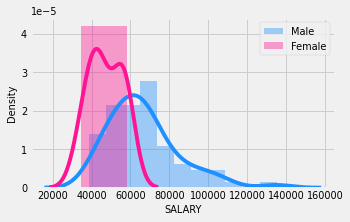

In [163]:
plt.subplots(figsize=(5,3), dpi=70)
sns.distplot(manager_m , color="dodgerblue", label='Male')
sns.distplot(manager_f , color="deeppink", label='Female')
plt.legend();

### Salary distribution for administrative jobs (& Gender)

In [206]:
admin_m = df[(df['GENDER']==1) & (df['JOBCAT']==1)].SALARY
admin_f = df[(df['GENDER']==0) & (df['JOBCAT']==1)].SALARY

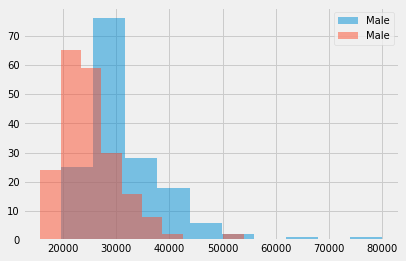

In [207]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(admin_m, label=("Male", "Female"), bins=10, alpha=0.5)
ax.hist(admin_f, label=("Male", "Female"), bins=10, alpha=0.5)
ax.legend()

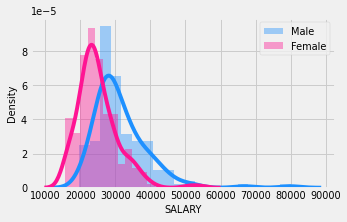

In [162]:
plt.subplots(figsize=(5,3), dpi=70)
sns.distplot(admin_m , color="dodgerblue", label='Male')
sns.distplot(admin_f , color="deeppink", label='Female')
plt.legend();

### Education vs Salaries (for Management)

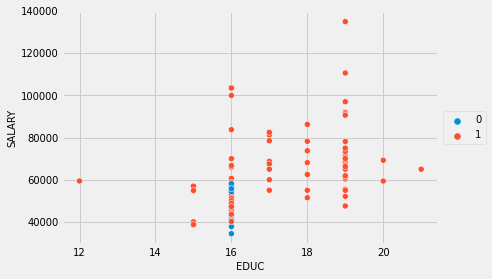

In [187]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df[df.JOBCAT==3],
    x='EDUC',           
    y='SALARY',
    hue='GENDER',                 # group points by color
    #size='MINORITY'        # group points by size
    #style='JOBCAT'
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Education vs Salaries (for administrative Jobs)

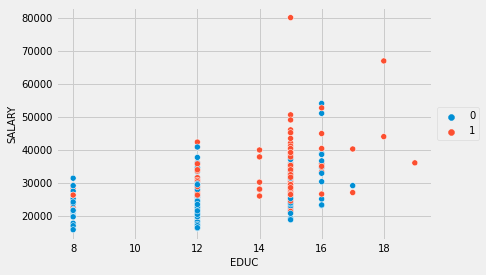

In [186]:
plt.style.use('fivethirtyeight') # 'dark_background', 'fivethirtyeight', 'grayscale', ...
plt.rcParams.update({
    'font.size': 10,
    'axes.labelsize': 10,
    'axes.titlesize': 'x-large'
})
#sns.relplot(data=df, x='temp_min', y='temp_max', hue='wind', size='precipitation')
g=sns.scatterplot(
    data=df[df.JOBCAT==1],
    x='EDUC',           
    y='SALARY',
    hue='GENDER',                 # group points by color
    #size='MINORITY'        # group points by size
    #style='JOBCAT'
    )
g.legend(
    loc='center left',          # location of the legend
    bbox_to_anchor=(1.0, 0.5),  # horizontal and vertical position of the legend
    ncol=1                      # number of legend columns
    )
#plt.xlabel("Minimum Temperature [°C]")
#plt.ylabel("Maximum Temperature [°C]")
#plt.title('Minimum vs. Maximum Temperature (Seattle Weather)')

### Distribution of Salaries for Man and Woman @Management & @16y of Education

In [209]:
manager_16_df_m = df[(df['JOBCAT']==3) & (df['EDUC']==16) & (df['GENDER']==1)].SALARY
manager_16_df_f = df[(df['JOBCAT']==3) & (df['EDUC']==16) & (df['GENDER']==0)].SALARY

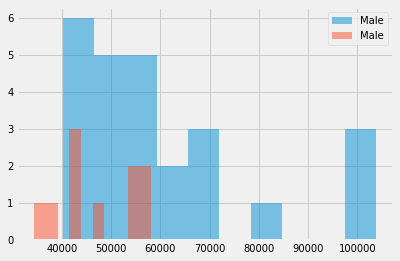

In [211]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(manager_16_df_m, label=("Male", "Female"), alpha=0.5)
ax.hist(manager_16_df_f, label=("Male", "Female"), alpha=0.5)
ax.legend()

### Distribution of Salaries for Man and Woman @Admin & @8y of Education

In [212]:
admin_8_df_m = df[(df['JOBCAT']==1) & (df['EDUC']==8) & (df['GENDER']==1)].SALARY
admin_8_df_f = df[(df['JOBCAT']==1) & (df['EDUC']==8) & (df['GENDER']==0)].SALARY

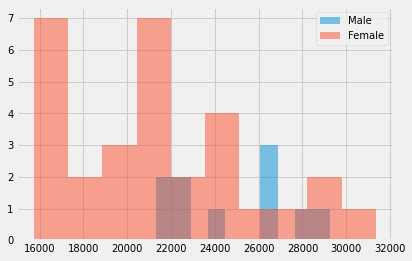

In [215]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(admin_8_df_m, label="Male", alpha=0.5)
ax.hist(admin_8_df_f, label="Female", alpha=0.5)
ax.legend()

### Distribution of Salaries for Man and Woman @Admin & @12y of Education

In [216]:
admin_12_df_m = df[(df['JOBCAT']==1) & (df['EDUC']==12) & (df['GENDER']==1)].SALARY
admin_12_df_f = df[(df['JOBCAT']==1) & (df['EDUC']==12) & (df['GENDER']==0)].SALARY

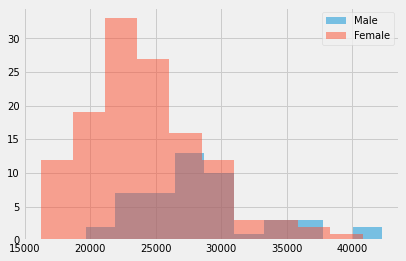

In [217]:
fig = plt.figure()
ax = fig.add_subplot(111)

ax.hist(admin_12_df_m, label="Male", alpha=0.5)
ax.hist(admin_12_df_f, label="Female", alpha=0.5)
ax.legend()

In [ ]:
# Plots nebeneinander in seaborn

#%% 2 plot with plt
fig, axes = plt.subplots(2, 3, figsize=(18, 10))

fig.suptitle('2 x 3 plot')

sns.lineplot(ax=axes[0, 0],  x=x, y=y)
sns.lineplot(ax=axes[0, 1],  x=x, y=y)
sns.lineplot(ax=axes[0, 2],  x=x, y=y)
sns.lineplot(ax=axes[1, 0],  x=x, y=y)
sns.lineplot(ax=axes[1, 1],  x=x, y=y)
sns.lineplot(ax=axes[1, 2],  x=x, y=y)

axes[0,0].set_title('sub fig 0 0')
axes[1,1].set_title('sub fig 1 1')
axes[1,2].set_title('sub fig 1 2')

#Note: to increase the size of all the labels in the same time, a simple solution is to use:
sns.set(font_scale=1.2)

fig.tight_layout() # fix space
plt.show()